In [18]:
""" 
Here we look at STRs with high anova pvalues in quadratic tests and positive delta aic 
from out linear regression test.
Plot before and after
"""# Set up
%pylab inline
#Assuming you ran gtex_variables.ipynb first
%store -r    
# Libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn.apionly as sns
#
def ExtractData(gene, chrom, start, tissue):
    """By MG"""
    if "(" in tissue: tissue = tissue.split("(")[0]
    vcf = "/storage/szfeupe/Runs/650GTEx_estr/Merged_STRs_all_samples.vcf.gz"
    # Pull out STR genotypes
    cmd = """bcftools query -r %s:%s-%s -f"[%%SAMPLE\\t%%GB\\n]" %s | \
    grep -v "\." | sed 's/|/\\t/' | awk '{print $1 "\\t" $2+$3}' > str_genotypes.tab"""%(chrom, start, start, vcf)
    os.system(cmd)
    # Pull out STR genotypes - alleles
    cmd = """bcftools query -r %s:%s-%s -f"[%%SAMPLE\\t%%GB\\n]" %s | \
    grep -v "\." | sed 's/|/\\t/' | awk '{print $1 "\\t" $2","$3}' > str_genotypes_alleles.tab"""%(chrom, start, start, vcf)
    os.system(cmd)
    # Pull out gene expression
    expr="/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/%s/Corr_Expr.csv"%tissue
    colnum = open(expr,"r").readline().split(",").index('"' + gene + '"')+2
    cmd = """cat %s | cut -d',' -f 1,%s | grep -v ENSG > expr.tab"""%(expr, colnum)
    os.system(cmd)
    
        
def PlotESTR(gene, tissue, chrom, start, COLORS, name, motif):
    strgt = pd.read_csv("str_genotypes.tab", sep="\t", names=["sample","str"])
    strgt["sample"] = strgt["sample"].apply(lambda x: "-".join(x.split("-")[0:2]))
    
    rmgts = []
    for gt in sorted(list(set(strgt["str"]))):
        if strgt[strgt["str"]==gt].shape[0] <3: rmgts.append(gt)
    strgt = strgt[strgt["str"].apply(lambda x: x not in rmgts)]
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    expr = pd.read_csv("expr.tab", names=["sample","expr"])
    data = pd.merge(strgt, expr)
    sns.swarmplot(x="str", y="expr", ax=ax, data=data, color=COLORS[tissue])
    ax.set_xlabel("bp (rel. to hg19)", size=15)
    ax.set_ylabel("Expression - %s"%tissue, size=15)
    ax.set_xticklabels([int(item) for item in sorted(list(set(data["str"])))], size=12)
    ax.set_yticklabels(["%.2f"%(item) for item in ax.get_yticks()], size=12)
    ax.set_title("")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title("chr%s:%s - %s \n %s - Motif unit: %s"%(chrom, start, gene,name,motif))
    plt.suptitle("");
    plt.show()
    fig.savefig("%s_Quad_estr.pdf"%gene)
 
    
REGDIR = "/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/Lung/"

Populating the interactive namespace from numpy and matplotlib


In [26]:
#Open regressions
quadreg = pd.read_csv(os.path.join(REGDIR, "QuadraticReg/quadratic_reg_out.table"), sep="\t")
linereg = pd.read_csv(os.path.join(REGDIR,"Master.table"), sep="\t")
print(1, quadreg.shape)
#Clean up
quadreg = quadreg.loc[quadreg["delta_aic[Lin-Quad]"]!='None']
print(2, quadreg.shape)
quadreg["delta_aic[Lin-Quad]"] = quadreg["delta_aic[Lin-Quad]"].astype(float)
print(3, quadreg.shape)
quadreg = quadreg.replace([np.inf], np.nan)
print(4, quadreg.shape)
#Select STRs with delaAIC>0 and significant pvalues 
#quadreg= quadreg.loc[quadreg["delta_aic[Lin-Quad]"]>0]
#quadreg = quadreg.loc[(quadreg['anova_pva'].astype(float)<=0.05) & (quadreg['anova_pva'].astype(float)>0) ]
quadreg.loc[quadreg['str.id']=='STR_1209175'][['gene','str.id','alpha','beta','beta.se', 'beta.pval','alpha.pval','delta_aic[Lin-Quad]']].sort_values('gene')

1 (94386, 18)
2 (94229, 18)
3 (94229, 18)
4 (94229, 18)


,gene,str.id,alpha,beta,beta.se,beta.pval,alpha.pval,delta_aic[Lin-Quad]
3,ENSG00000078808.12,STR_1209175,-0.0217348414717,0.00204437658128,0.00378945407146,0.590018818374,0.179845648642,-505.110045
20,ENSG00000107404.13,STR_1209175,-0.000178392602583,-0.00187264595274,0.00380095830324,0.622664549013,0.991227846899,-595.237434
14,ENSG00000127054.14,STR_1209175,-0.00182654849511,-0.0034562482768,0.00379203128223,0.362918941398,0.91016111431,-650.083688
10,ENSG00000131584.14,STR_1209175,-0.0142601789612,-0.00166661740339,0.00378600699132,0.66016188066,0.377958462222,-606.979556
6,ENSG00000160087.16,STR_1209175,0.00550594762605,0.00220698864423,0.00379535176144,0.561418672292,0.734007955118,-615.000169
0,ENSG00000162571.9,STR_1209175,0.000822742448862,0.000908829667731,0.00380312249023,0.811321303085,0.95958264359,-349.952959
8,ENSG00000162572.15,STR_1209175,-0.0367910938964,0.00151546106874,0.00375207545019,0.686625200994,0.0222989007419,-602.748817
22,ENSG00000162576.12,STR_1209175,0.0196345025539,-0.000761364387227,0.00378914841013,0.840911255677,0.225469662045,-554.204243
18,ENSG00000169962.4,STR_1209175,-0.0131723145425,0.00322257929628,0.00379774262628,0.396926876142,0.416801825044,-248.645055
12,ENSG00000169972.7,STR_1209175,-0.0296894613086,0.00291061576162,0.00377708236388,0.441658041568,0.0664662769883,-542.387487


In [25]:
linereg.loc[linereg['str.id']=='STR_1209175'][['gene','str.id','beta','beta.se', 'qvalue','significant']].sort_values('gene')

,gene,str.id,beta,beta.se,qvalue,significant
480,ENSG00000078808.12,STR_1209175,-0.080795,0.062296,0.589516,0
672,ENSG00000107404.13,STR_1209175,-0.025997,0.062479,NaN,0
1542,ENSG00000127054.14,STR_1209175,-0.055435,0.062404,NaN,0
1590,ENSG00000131584.14,STR_1209175,-0.093340,0.062227,NaN,0
2917,ENSG00000160087.16,STR_1209175,0.057002,0.062398,NaN,0
3135,ENSG00000162571.9,STR_1209175,0.016282,0.062492,1.000000,0
3136,ENSG00000162572.15,STR_1209175,-0.162844,0.061666,0.154646,0
3138,ENSG00000162576.12,STR_1209175,0.087541,0.062260,0.740234,0
3708,ENSG00000169962.4,STR_1209175,-0.022370,0.062484,NaN,0
3710,ENSG00000169972.7,STR_1209175,-0.108783,0.062129,0.541830,0


In [6]:
L=list(quadreg["delta_aic[Lin-Quad]"])
print(quadreg.shape, len(L), max(L), min(L))
bin_values = np.arange(start=min(L), stop=max(L), step=50)
#permuted["delta_aic[Lin-Quad]"].plot(kind='hist', bins=bin_values, figsize=[12,5], alpha=.3, legend=True, label='Permuted', color='red')
quadreg["delta_aic[Lin-Quad]"].plot(kind='hist', bins=bin_values, figsize=[12,5], alpha=.2, legend=True, label='Observed', color='blue')
plt.xticks(np.arange(-3000, 18000, 1000), rotation=60)
plt.grid(color='lightgrey', linestyle='--')
plt.title("Delta AIC distriution [Lin-Quad] \n 'Guadratic regression test'")
plt.show()


ValueError: max() arg is an empty sequence

In [93]:
estrs = linereg.loc[linereg['qvalue']>0.1][["gene","chrom","str.id","str.start","gene.name", "qvalue", "motif", "top.variant"]]
estrs['period'] = estrs['motif'].apply(lambda x: len(x))
print(estrs.shape)
quad_estr = estrs.merge(quadreg, on=["gene","chrom","str.id","str.start"])
for i in range(1,7,1):
    print(quad_estr.loc[quad_estr['period']==i].shape[0])

#Play with alpha and beta values
squadestrs = quad_estr.loc[quad_estr['alpha'].astype(float)>0.1].sort_values("anova_pva").head(5)
squadestrs.shape

(13611, 9)
1370
2787
431
1475
308
148


(5, 23)

alpha= 0.166712558996  beta= -0.0219135953735 ANOVA pvalue= 0.0011555884766471123


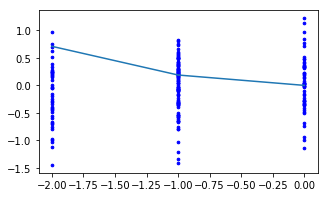

alpha= 0.983136342762  beta= -0.43399010683 ANOVA pvalue= 1.023808622854224e-46


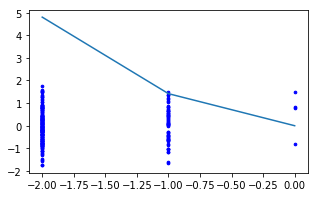

alpha= 0.243506888414  beta= -0.127732915997 ANOVA pvalue= 1.032882163595697e-26


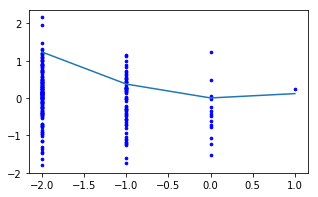

alpha= 0.475205385063  beta= -0.0720424952168 ANOVA pvalue= 1.0906428938423024e-146


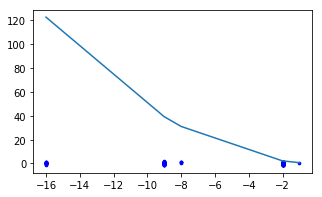

alpha= 0.364961583208  beta= -0.0939282443855 ANOVA pvalue= 1.103552857533992e-60


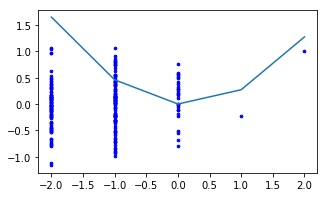

In [94]:


lines(Data$x, predict(nls_fit), col = "red")


for index, item in squadestrs.iterrows():
    chrom = item["chrom"].split('r')[1]
    gene = item["gene"]
    start = item['str.start']
    tissue = "Lung"
    alpha = float(item['alpha'])
    beta = float(item['beta']) 
    print('alpha=', alpha, ' beta=', beta, 'ANOVA pvalue=', item['anova_pva'])
    ExtractData(gene, chrom, start, tissue)
    expr = pd.read_csv("expr.tab", names=["sample","expr"])
    strgt = pd.read_csv("str_genotypes.tab", sep="\t", names=["sample","str"])
    strgt['sample']=strgt['sample'].apply(lambda x: "-".join(x.split('-')[:2]))
    data = pd.merge(strgt, expr)
    plt.figure( figsize=(5,3))
    plt.scatter(data['str'], data['expr'], color='blue',marker='o', s=7)
    #fit a non-linear regression
    nls_fit <- nls(y ~ a + b * x^(-c), Data, start = list(a = 80, b = 20, c = 0.2))
    x = sorted([float(i) for i in list(data['str'])])
    plt.plot(x,[alpha*i**2 + beta*i for i in x])
    plt.show()
    #break


Alpha =  0.166712558996  Beta =  -0.0219135953735


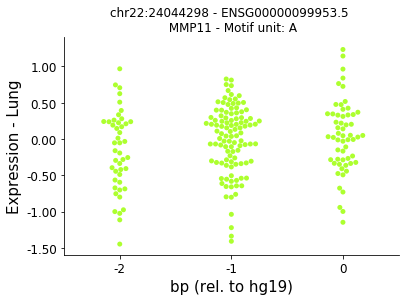


Alpha =  0.983136342762  Beta =  -0.43399010683


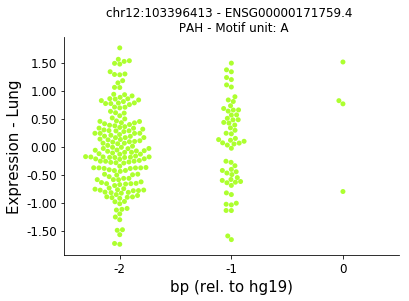


Alpha =  0.243506888414  Beta =  -0.127732915997


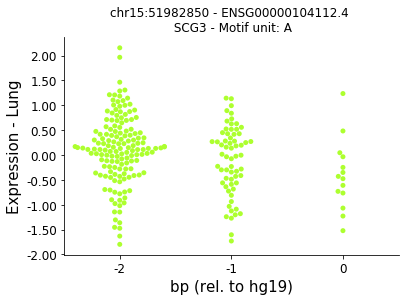


Alpha =  0.475205385063  Beta =  -0.0720424952168


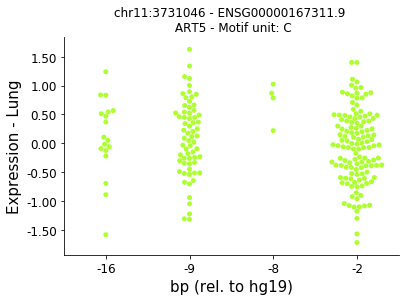


Alpha =  0.364961583208  Beta =  -0.0939282443855


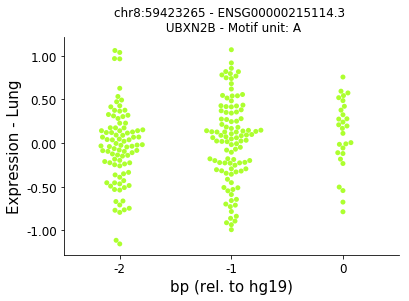

In [97]:
#Interpretation Top 15 eSTRs that are called in quadratic
"""alpha (squared term)  > 0 ==> Relationship is convex
                         < 0 ==> Relationship is concave 
"""
squadestrs = quad_estr.loc[quad_estr['alpha'].astype(float)>0.1].sort_values("anova_pva").head(5)

for index, item in strquad.iterrows():
    chrom = item["chrom"].split('r')[1]
    gene = item["gene"]  
    start = item['str.start']
    tissue = "Lung"
    genename = item['gene.name']
    motif = item['motif']
    print('\nAlpha = ', item['alpha'], " Beta = ",item['beta'])
    ExtractData(gene, chrom, start, tissue)
    PlotESTR(gene, tissue, chrom, start, COLORS, genename, motif)